**1. What is hypothesis testing in statistics?**

Answer:
Hypothesis testing is a formal statistical procedure to decide whether there is enough evidence in a sample of data to infer that a certain condition about a population parameter holds. You start with a null hypothesis (usually a statement of no effect or status-quo) and an alternative hypothesis (what you want to show). Using a test statistic computed from sample data and its known sampling distribution under the null, you compute a p-value or compare the statistic to critical values at a chosen significance level. Based on that you either reject the null (evidence for the alternative) or fail to reject it (insufficient evidence).

**2. What is the null hypothesis, and how does it differ from the alternative hypothesis?**

Answer:

Null hypothesis (H₀): A baseline statement about a population parameter that we assume true until evidence suggests otherwise (e.g., H₀: μ = μ₀).

Alternative hypothesis (H₁ or Ha): The statement we consider if the null is rejected (e.g., H₁: μ ≠ μ₀, μ > μ₀, or μ < μ₀).
Difference: H₀ is what we test against and usually represents no change/effect; H₁ is what we hope to have evidence for. Tests are set up to control error rates under the assumption that H₀ is true.

**3. Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.**

Answer:
The significance level (α) is the threshold probability of making a Type I error — rejecting the null hypothesis when it is actually true. Common α values: 0.05, 0.01. When you compute a p-value from the data, if p ≤ α, you reject H₀; if p > α, you fail to reject H₀. Choosing α balances willingness to risk a false positive versus the need to detect an effect.

**4. What are Type I and Type II errors? Give examples of each.**

Answer:

Type I error (False positive): Rejecting H₀ when H₀ is true. Probability = α.
Example: A new drug is actually ineffective (H₀ true) but the test concludes it works — leads to approving an ineffective drug.

Type II error (False negative): Failing to reject H₀ when H₁ is true. Probability = β.
Example: Drug actually works (H₁ true) but we conclude it does not, so a beneficial drug is discarded.

Power = 1 − β is the probability of correctly rejecting a false null.

**5. What is the difference between a Z-test and a T-test? Explain when to use each.**

Answer:

Z-test: Uses the normal (Z) distribution for the test statistic. Appropriate when the population standard deviation (σ) is known or when sample size is large (by CLT) and σ can be approximated reliably.

T-test: Uses Student’s t-distribution and is appropriate when the population standard deviation σ is unknown and the sample comes from a (approximately) normal population, especially when sample size is small. The t-distribution has heavier tails; with increasing sample size it converges to the normal.

Use z-test when σ is known (rare in practice) or n large; use t-test when σ is unknown and n is not large.

**6. Write a Python program to generate a binomial distribution with n=10 and p=0.5, then plot its histogram.**

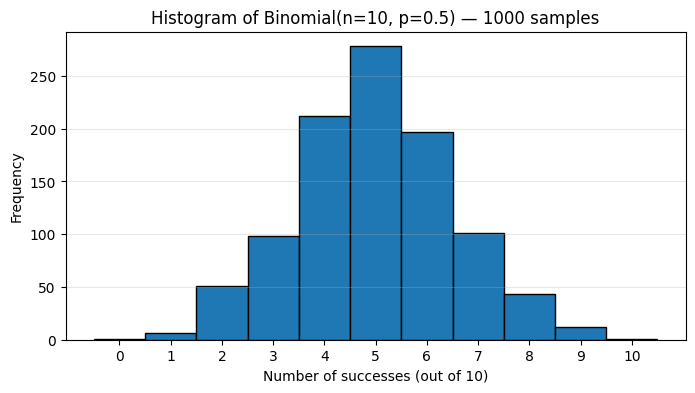

In [1]:
# Q6: Generate binomial distribution and plot histogram
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10       # number of trials per draw
p = 0.5      # success probability
size = 1000  # number of draws / samples

# Generate binomial random samples: number of successes in n trials
samples = np.random.binomial(n=n, p=p, size=size)

# Plot histogram (counts for each possible number of successes 0..n)
plt.figure(figsize=(8,4))
plt.hist(samples, bins=np.arange(-0.5, n+1.5, 1), edgecolor='black')
plt.xticks(range(0, n+1))
plt.title('Histogram of Binomial(n=10, p=0.5) — 1000 samples')
plt.xlabel('Number of successes (out of 10)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()


**7. Implement hypothesis testing using Z-statistics for a sample dataset in Python. Show the Python code and interpret the results.**


In [2]:
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
               50.3, 50.4, 50.0, 49.7, 50.5, 49.9]


Answer — Setup, code, computation and interpretation

We'll test:

H₀: μ = 50

H₁: μ ≠ 50 (two-sided)

Because the question asks to implement using Z-statistics, we'll compute a Z-statistic using the sample standard deviation as an estimate of population sigma (this is a common approximation when population sigma is unknown and sample size is decent). (Note: strictly speaking, using the sample standard deviation should lead to a t-test; but the exercise specifically asks for Z-statistics, so we proceed with Z using sample std as sigma estimate.)

In [3]:
import numpy as np
import math
from scipy import stats

sample_data = [49.1,50.2,51.0,48.7,50.5,49.8,50.3,50.7,50.2,49.6,
               50.1,49.9,50.8,50.4,48.9,50.6,50.0,49.7,50.2,49.5,
               50.1,50.3,50.4,50.5,50.0,50.7,49.3,49.8,50.2,50.9,
               50.3,50.4,50.0,49.7,50.5,49.9]

arr = np.array(sample_data)
n = arr.size
xbar = arr.mean()
# Use population std estimate (or sample std); here we use population std (ddof=0) as approximation
sigma_est = arr.std(ddof=0)
mu0 = 50.0

# Z-statistic
z = (xbar - mu0) / (sigma_est / math.sqrt(n))

# two-sided p-value from standard normal
p_value = 2 * (1 - 0.5 * (1 + math.erf(abs(z) / math.sqrt(2))))

print(f"n = {n}")
print(f"sample mean = {xbar:.6f}")
print(f"estimated sigma (population std) = {sigma_est:.6f}")
print(f"Z-statistic = {z:.6f}")
print(f"two-sided p-value = {p_value:.6f}")


n = 36
sample mean = 50.088889
estimated sigma (population std) = 0.529034
Z-statistic = 1.008128
two-sided p-value = 0.313393


**8. Write a Python script to simulate data from a normal distribution and calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.**

n = 50, sample mean = 96.6179, sample s = 14.0050
95% CI for the mean: (92.6377, 100.5981)


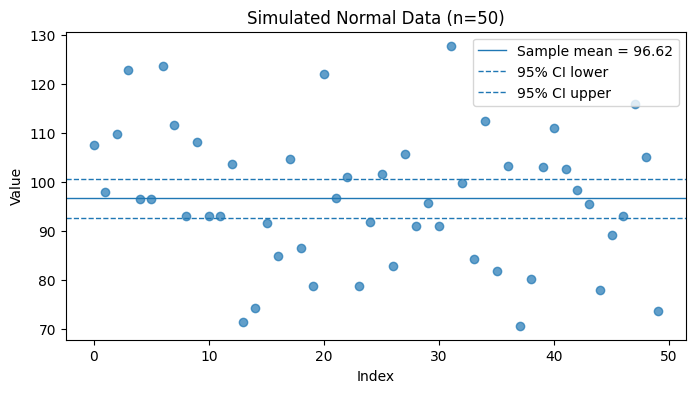

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

# Simulate data
np.random.seed(42)
n = 50
mu_true = 100.0
sigma_true = 15.0
data = np.random.normal(loc=mu_true, scale=sigma_true, size=n)

# Sample stats
xbar = data.mean()
s = data.std(ddof=1)  # sample standard deviation

# 95% CI for mean using t-distribution:
alpha = 0.05
df = n - 1
t_crit = stats.t.ppf(1 - alpha/2, df)
se = s / math.sqrt(n)
ci_lower = xbar - t_crit * se
ci_upper = xbar + t_crit * se

print(f"n = {n}, sample mean = {xbar:.4f}, sample s = {s:.4f}")
print(f"95% CI for the mean: ({ci_lower:.4f}, {ci_upper:.4f})")

# Plot data (scatter + horizontal line for mean and CI)
plt.figure(figsize=(8,4))
plt.plot(data, 'o', alpha=0.7)
plt.axhline(xbar, linestyle='-', linewidth=1, label=f'Sample mean = {xbar:.2f}')
plt.axhline(ci_lower, linestyle='--', linewidth=1, label='95% CI lower')
plt.axhline(ci_upper, linestyle='--', linewidth=1, label='95% CI upper')
plt.title('Simulated Normal Data (n=50)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


**9. Write a Python function to calculate the Z-scores from a dataset and visualize the standardized data using a histogram. Explain what the Z-scores represent in terms of standard deviations from the mean.**

mean: 10.75 std: 1.3919410907075054
z-scores: [-0.539  0.898 -1.257  0.18   1.616 -0.539  0.898 -1.257]


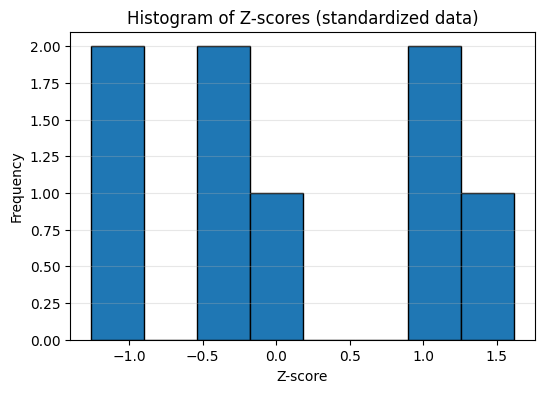

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def compute_zscores(data):
    arr = np.array(data, dtype=float)
    mu = arr.mean()
    sigma = arr.std(ddof=0)  # population std
    if sigma == 0:
        raise ValueError("Standard deviation is zero; cannot compute Z-scores.")
    zscores = (arr - mu) / sigma
    return zscores, mu, sigma

# Example usage:
example_data = [10, 12, 9, 11, 13, 10, 12, 9]
zs, mu, sigma = compute_zscores(example_data)
print("mean:", mu, "std:", sigma)
print("z-scores:", np.round(zs, 3))

# Plot histogram of z-scores
plt.figure(figsize=(6,4))
plt.hist(zs, bins=8, edgecolor='black')
plt.title('Histogram of Z-scores (standardized data)')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.show()


What Z-scores represent:
A Z-score for a value x is (x − μ)/σ. It measures how many standard deviations x is from the mean μ.

Z = 0 → exactly at the mean.

Z = +1 → one standard deviation above the mean.

Z = −2 → two standard deviations below the mean.
Z-scores standardize different datasets so they share mean 0 and standard deviation 1 (if using population std), enabling comparisons across different scales.